In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, header=None, names=column_names, na_values="?")

In [3]:
# Handle missing values
df.dropna(inplace=True)

In [4]:
# Preprocessing
X = df.drop(columns=['target'])
y = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert target values to binary (1: heart disease, 0: no heart disease)

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

In [8]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


In [9]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.8833333333333333
Precision: 0.8695652173913043
Recall: 0.8333333333333334
F1 Score: 0.851063829787234
Confusion Matrix:
 [[33  3]
 [ 4 20]]


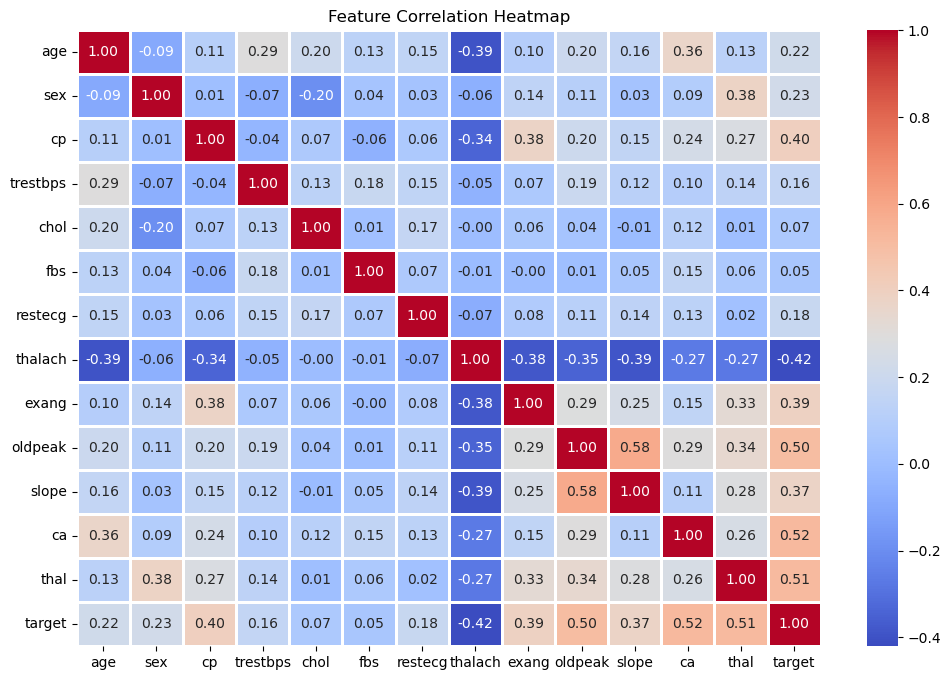

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=1, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


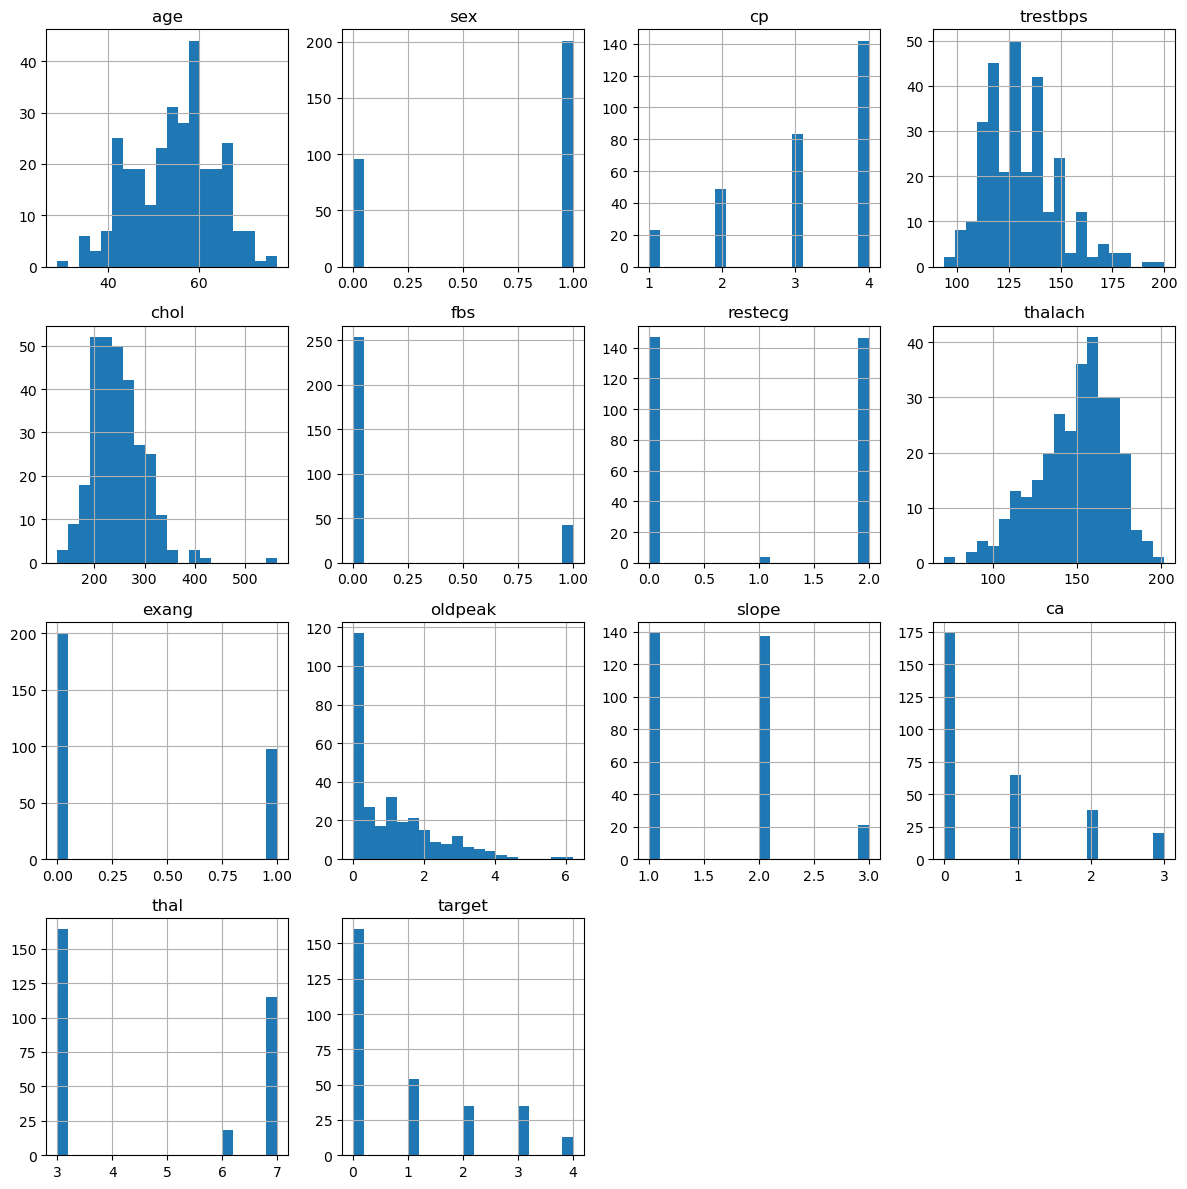

In [23]:
df.hist(bins=20, figsize=(12, 12))
plt.tight_layout()
plt.show()


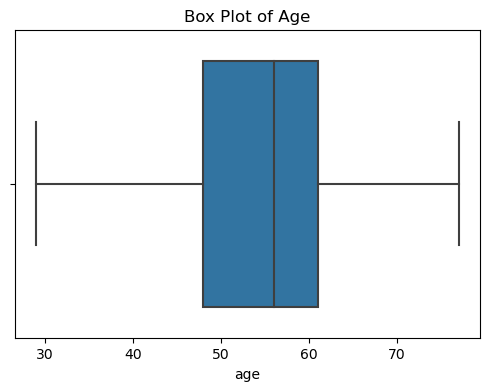

In [24]:
# For example, to create a box plot for 'age' feature
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'])
plt.title("Box Plot of Age")
plt.show()


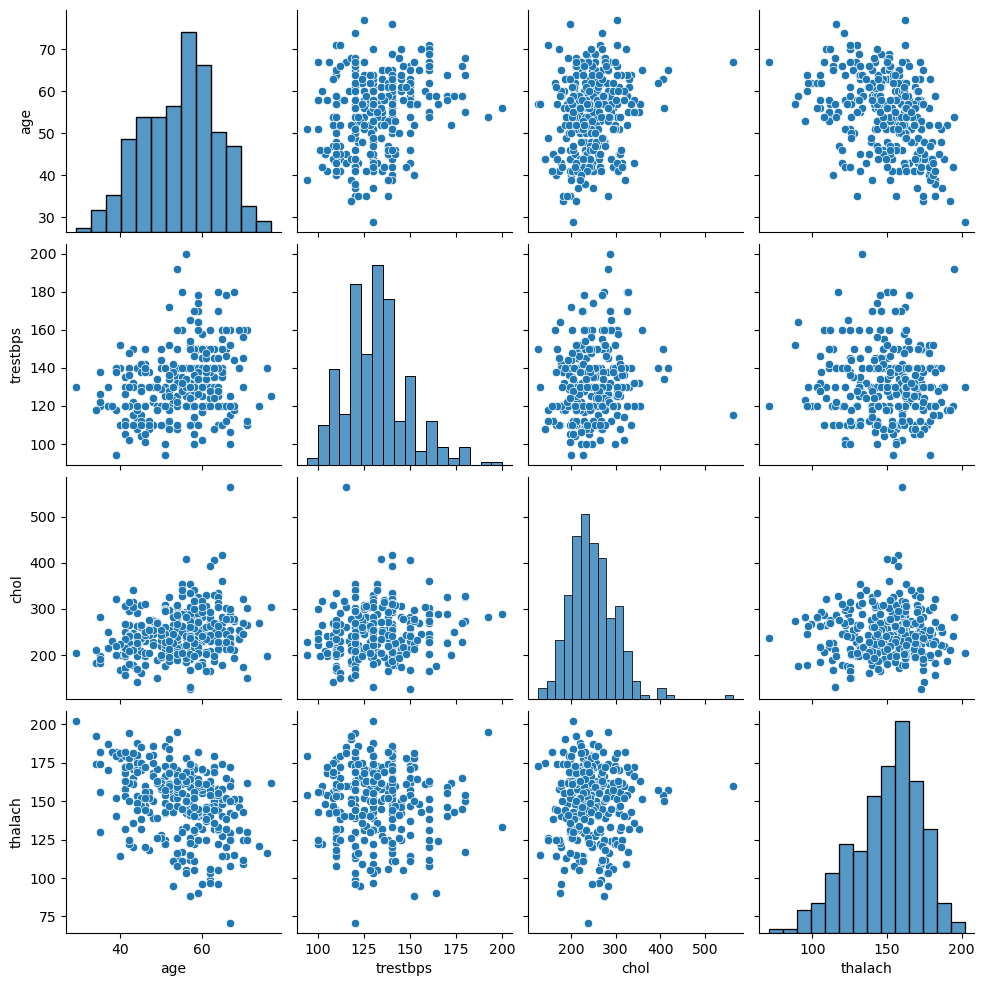

In [25]:
# Create a pair plot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach']
sns.pairplot(df[selected_features])
plt.show()


# Improvements from the paper provided earlier

In [10]:
# Define the parameter grid for the SVM classifier
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # only relevant for 'poly' kernel
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100]  # only relevant for 'rbf', 'poly' and 'sigmoid' kernels
}

In [11]:
# Instantiate the SVM classifier
svm_classifier = SVC()

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [12]:
# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [13]:
# Train the SVM classifier with the best parameters
best_svm_classifier = grid_search.best_estimator_
best_svm_classifier.fit(X_train, y_train)


SVC(C=0.1, degree=2, kernel='sigmoid')

In [14]:
# Predictions
y_pred = best_svm_classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [15]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [16]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)

Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
Accuracy: 0.9333333333333333
Precision: 0.9545454545454546
Recall: 0.875
F1 Score: 0.9130434782608695
Confusion Matrix:
 [[35  1]
 [ 3 21]]
